In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import plotnine as pn
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(5,5), transparent=True, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
PIL                 8.1.1
adjustText          NA
anndata             0.7.5
anyio               NA
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
descartes           NA
fasteners           NA
future_fstrings     NA
google              NA
h5py                2.10.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_serv

In [4]:
ileum_infection_sc = sc.read_h5ad(filename="./../pyobjs/ileum_infection_sc.h5ad")

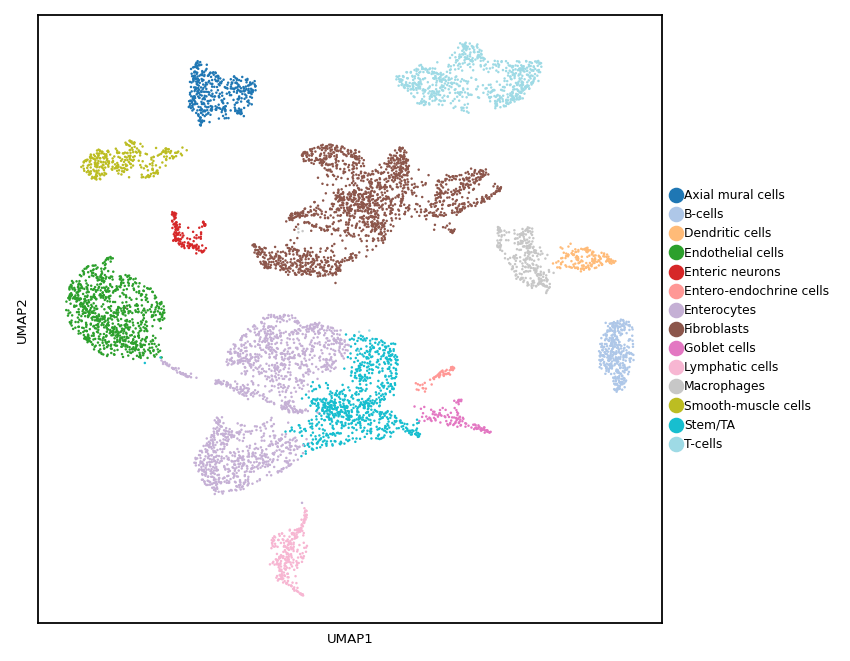

In [7]:
sc.pl.umap(ileum_infection_sc, color = ['celltype_groups'], size=5, palette="tab20", title="")


In [74]:
T1L_WT_Ileum_D1PI_xGen = sc.read_10x_h5('./../scData/sc_xGen21/Ileum_T1L_D1PI_xGen/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Ileum_D4PI_xGen = sc.read_10x_h5('./../scData/sc_xGen21/Ileum_T1L_D4PI_xGen/outs/filtered_feature_bc_matrix.h5')

T1L_WT_Ileum_D1PI_xGen.var_names_make_unique()
T1L_WT_Ileum_D4PI_xGen.var_names_make_unique()

samples_xGen = ["Ileum_T1L-WT_D1PI", "Ileum_T1L-WT_D4PI"]

total_ileum_sc_xGen_subset = T1L_WT_Ileum_D1PI_xGen.concatenate(T1L_WT_Ileum_D4PI_xGen, 
                                                    batch_key= "sample", batch_categories=samples_xGen,
                                                    index_unique="-")

reading ./../scData/sc_xGen21/Ileum_T1L_D1PI_xGen/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen21/Ileum_T1L_D4PI_xGen/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [75]:
reoviral_genes = [name for name in total_ileum_sc_xGen_subset.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = total_ileum_sc_xGen_subset[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
viral_expression.columns = [name + "_xGen" for name in viral_expression.columns]

print(total_ileum.obs.shape)
total_ileum.obs = total_ileum.obs.join(viral_expression)
print(total_ileum.obs.shape)
total_ileum.obs['total_viral_xGen'] = viral_expression.sum(axis=1).astype(int)
total_ileum.obs['pct_viral_xGen'] = ((total_ileum.obs['total_viral_xGen']) / (total_ileum.obs['total_viral_xGen'] + total_ileum.obs['total_counts']))

total_ileum.obs['total_viral_NA'] = total_ileum.obs['total_viral']
total_ileum.obs['total_viral_xGen_NA'] = total_ileum.obs['total_viral_xGen']
total_ileum.obs['total_viral_NA'][total_ileum.obs['total_viral_NA']==0] = np.nan
total_ileum.obs['total_viral_xGen_NA'][total_ileum.obs['total_viral_xGen_NA']==0] = np.nan
total_ileum.obs["total_viral_xGen"][total_ileum.obs['total_viral_xGen'].isnull()] = 0

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(7695, 31)
(7695, 41)


<ipython-input-75-ae0a04220814>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-75-ae0a04220814>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-75-ae0a04220814>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [76]:
total_ileum.obs["total_viral_xGen_thresh2"] = total_ileum.obs["total_viral_xGen_NA"]
total_ileum.obs["total_viral_xGen_thresh2"][(total_ileum.obs["total_viral_xGen_thresh2"] < 2)] = np.NaN
total_ileum.obs["total_viral_xGen_thresh5"] = total_ileum.obs["total_viral_xGen_NA"]
total_ileum.obs["total_viral_xGen_thresh5"][(total_ileum.obs["total_viral_xGen_thresh5"] < 5)] = np.NaN
total_ileum.obs["total_viral_xGen_thresh10"] = total_ileum.obs["total_viral_xGen_NA"]
total_ileum.obs["total_viral_xGen_thresh10"][(total_ileum.obs["total_viral_xGen_thresh10"] < 10)] = np.NaN

total_ileum.obs['pct_viral_xGen_thresh2'] = ((total_ileum.obs['total_viral_xGen_thresh2']) / (total_ileum.obs['total_viral_xGen_thresh2'] + total_ileum.obs['total_counts'])) * 100
total_ileum.obs['pct_viral_xGen_thresh5'] = ((total_ileum.obs['total_viral_xGen_thresh5']) / (total_ileum.obs['total_viral_xGen_thresh5'] + total_ileum.obs['total_counts'])) * 100
total_ileum.obs['pct_viral_xGen_thresh10'] = ((total_ileum.obs['total_viral_xGen_thresh10']) / (total_ileum.obs['total_viral_xGen_thresh10'] + total_ileum.obs['total_counts'])) * 100

<ipython-input-76-2a2f522f9fd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-76-2a2f522f9fd7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-76-2a2f522f9fd7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


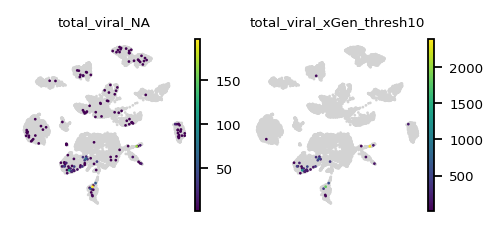

In [200]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, facecolor='white', frameon=True, figsize=(1.4, 1.4), transparent=True, vector_friendly=False, format="pdf")
sc.pl.umap(total_ileum, color=["total_viral_NA", "total_viral_xGen_thresh10"], size = 6, ncols=2, palette='viridis_r', frameon=False, wspace=0.2, save="ileum_viral_trop_umap_xgen.pdf")

In [181]:
total_ileum.obs["viral_exp"] = total_ileum.obs["total_viral_xGen_thresh10"]
mean_viral_exp = total_ileum.obs[["condition", "celltype_groups", "viral_exp"]].groupby(["condition", "celltype_groups"]).mean()["viral_exp"]
celltype_counts = total_ileum.obs.value_counts(subset=["condition", "celltype_groups"])
infected_cells_only = total_ileum[total_ileum.obs["viral_exp"] >= 0, :]
infected_cells_only
infected_cells_only.obs["condition"] = infected_cells_only.obs["condition"].cat.set_categories(total_ileum.obs["condition"].cat.categories)
infected_cells_only.obs["celltype_groups"] = infected_cells_only.obs["celltype_groups"].cat.set_categories(total_ileum.obs["celltype_groups"].cat.categories)
infected_celltypes_counts = infected_cells_only.obs.value_counts(subset=["condition", "celltype_groups"])
count_data = pd.DataFrame({'mean_viral_exp': mean_viral_exp, 'total_counts': celltype_counts, 'infected_counts': infected_celltypes_counts})
count_data["pct_cells"] = round(((count_data["infected_counts"]/count_data["total_counts"]) * 100), 2)
count_data = count_data.iloc[count_data.index.get_level_values('condition').isin(["T1L-WT_D1PI", "T1L-WT_D4PI"])]
celltype_counts = count_data.unstack("celltype_groups")
celltype_counts = celltype_counts.reindex(["T1L-WT_D1PI", "T1L-WT_D4PI"])
celltype_counts

Trying to set attribute `.obs` of view, copying.


mean_viral_exp                                            \
celltype_groups Axial mural cells B-cells Dendritic cells Endothelial cells   
condition                                                                     
T1L-WT_D1PI                  76.0   170.0             NaN              26.0   
T1L-WT_D4PI                   NaN     NaN             NaN               NaN   

                                                                     \
celltype_groups Enteric neurons Entero-endochrine cells Enterocytes   
condition                                                             
T1L-WT_D1PI                 NaN                  1276.0  273.653846   
T1L-WT_D4PI                 NaN                     NaN         NaN   

                                                          ...       pct_cells  \
celltype_groups Fibroblasts Goblet cells Lymphatic cells  ... Enteric neurons   
condition                                                 ...                   
T1L-WT_D1PI             NaN        108.0             NaN  ...             NaN   
T1L-WT_D4PI             NaN          NaN           586.6  ...             NaN   

                                                                              \
celltype_groups Entero-endochrine cells Enterocytes Fibroblasts Goblet cells   
condition                                                                      
T1L-WT_D1PI                        10.0        4.21         NaN          2.7   
T1L-WT_D4PI                         NaN         NaN         NaN          NaN   

                                                                         \
celltype_groups Lymphatic cells Macrophages Smooth-muscle cells Stem/TA   
condition                                                                 
T1L-WT_D1PI                 NaN         NaN                 NaN    0.26   
T1L-WT_D4PI                5.15         NaN                 NaN     NaN   

                         
celltype_groups T-cells  
condition                
T1L-WT_D1PI         NaN  
T1L-WT_D4PI         NaN  

[2 rows x 56 columns]

In [183]:
celltype_counts["mean_viral_exp"].to_csv("./../csvs/ileum_mean_viral_exp.csv")
celltype_counts["pct_cells"].to_csv("./../csvs/ileum_pct_cells.csv")

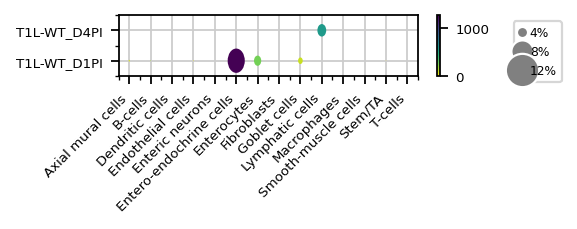

In [184]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), transparent=True, vector_friendly=False, format="pdf")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
plt.rcParams['axes.axisbelow'] = True

N = celltype_counts["pct_cells"].shape[0]
M = celltype_counts["pct_cells"].shape[1]
ylabels = celltype_counts["pct_cells"].index
xlabels = celltype_counts["pct_cells"].columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = celltype_counts["pct_cells"].fillna(0).to_numpy()
c = celltype_counts["mean_viral_exp"].fillna(0).to_numpy()
# print(c.flatten())
# print(s.flatten())

fig, ax = plt.subplots(figsize=(3.0,0.5))

R = (s/100.0)*4
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="viridis_r")
col.set_clim([0, np.max(c)])

ax.add_collection(col)
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.colorbar(col)

from matplotlib.lines import Line2D
line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=5, markerfacecolor="grey")
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="grey")
line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=15, markerfacecolor="grey")
plt.legend((line1,line2,line3),('4%','8%', "12%"),numpoints=1, bbox_to_anchor = (1.5,1.0))

plt.savefig("figures/viral_exp_allsamples_ileum_dotplot.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [11]:
Mock_Ileum_D1PI_sc = sc.read_10x_h5('./../scData/Ileum_Mock_D1PI/outs/raw_feature_bc_matrix.h5')
T1L_Ileum_D1PI_sc = sc.read_10x_h5('./../scData/Ileum_T1L-WT_D1PI/outs/raw_feature_bc_matrix.h5')
Mock_Ileum_D4PI_sc = sc.read_10x_h5('./../scData/Ileum_Mock_D4PI/outs/raw_feature_bc_matrix.h5')
T1L_Ileum_D4PI_sc = sc.read_10x_h5('./../scData/Ileum_T1L-WT_D4PI/outs/raw_feature_bc_matrix.h5')

Mock_Ileum_D1PI_sc.var_names_make_unique()
T1L_Ileum_D1PI_sc.var_names_make_unique()
Mock_Ileum_D4PI_sc.var_names_make_unique()
T1L_Ileum_D4PI_sc.var_names_make_unique()

reading ./../scData/Ileum_Mock_D1PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Ileum_T1L-WT_D1PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Ileum_Mock_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Ileum_T1L-WT_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [12]:
ileum_infection_sc_4samples = T1L_Ileum_D1PI_sc.concatenate(T1L_Ileum_D4PI_sc,
                                                    batch_key= "sample", 
                                                    batch_categories=["Ileum_T1L-WT_D1PI", "Ileum_T1L-WT_D4PI"],
                                                    index_unique="-")
ileum_infection_sc_4samples.obs_names_make_unique()
ileum_infection_sc_4samples.var_names_make_unique()
print(ileum_infection_sc_4samples.shape)

(2991872, 54848)


In [13]:
reoviral_genes = [name for name in ileum_infection_sc_4samples.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = ileum_infection_sc_4samples[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(ileum_infection_sc_4samples.var_names, reoviral_genes)
ileum_infection_sc_4samples_no_viral_genes = ileum_infection_sc_4samples[:, ~reoviral_genes_indicator]
ileum_infection_sc_4samples_no_viral_genes.var_names = [name.split("_")[1] for name in ileum_infection_sc_4samples_no_viral_genes.var_names]
ileum_infection_sc_4samples_no_viral_genes.obs = ileum_infection_sc_4samples_no_viral_genes.obs.join(viral_expression.astype(int))
print(ileum_infection_sc_4samples_no_viral_genes.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(2991872, 54838)


In [14]:
temp_dataset_no_viral_genes  = ileum_infection_sc_4samples_no_viral_genes
temp_dataset_no_viral_genes.var['mt'] = temp_dataset_no_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(temp_dataset_no_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [15]:
data = pd.DataFrame({"cell_barcode":temp_dataset_no_viral_genes.obs_names, "total_counts":temp_dataset_no_viral_genes.obs["total_counts"], "sample":temp_dataset_no_viral_genes.obs["sample"]})
data["Gapdh"] = temp_dataset_no_viral_genes[:,"Gapdh"].to_df()
data["Hba-a1"] = temp_dataset_no_viral_genes[:,"Hba-a1"].to_df()
data["cell_in_droplet"] = ["Viable cells" if data.loc[x, "total_counts"] > 200 else "Dead cells" for x in data["cell_barcode"]]
data["cell_in_droplet"] = ["Background" if data.loc[x, "total_counts"] < 3 else data.loc[x, "cell_in_droplet"] for x in data["cell_barcode"]]
data["total_counts"] = data["total_counts"] + 1
data["Gapdh"] = data["Gapdh"] + 1
data["Hba-a1"] = data["Hba-a1"] + 1
print(data.shape)
print(data["cell_in_droplet"].value_counts())

(2991872, 6)
Background      2811510
Dead cells       161589
Viable cells      18773
Name: cell_in_droplet, dtype: int64


In [16]:
data = data.sort_values(by="total_counts", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1

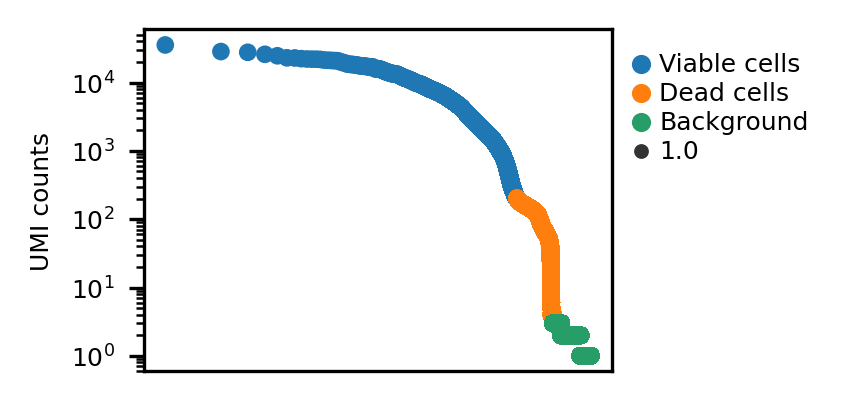

In [17]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
plt.xlabel("Droplets")
plt.ylabel("UMI counts")
sns.scatterplot(data = data, x = "cell_number", y = "total_counts", hue = "cell_in_droplet", linewidth = 0, size = 1.0, rasterized=True, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(yscale = "log", xscale = "log")
ax.axes.xaxis.set_visible(False)
# ax.axes.xaxis.set_ticks([])
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("./figures/knee_totalUMI_ileum.pdf")

In [18]:
T1L_WT_Ileum_D1PI_xGen = sc.read_10x_h5('./../scData/sc_xGen21/Ileum_T1L_D1PI_xGen/outs/raw_feature_bc_matrix.h5')
T1L_WT_Ileum_D4PI_xGen = sc.read_10x_h5('./../scData/sc_xGen21/Ileum_T1L_D4PI_xGen/outs/raw_feature_bc_matrix.h5')

T1L_WT_Ileum_D1PI_xGen.var_names_make_unique()
T1L_WT_Ileum_D4PI_xGen.var_names_make_unique()

samples_xGen = ["Ileum_T1L-WT_D1PI", "Ileum_T1L-WT_D4PI"]

total_ileum_sc_xGen = T1L_WT_Ileum_D1PI_xGen.concatenate(T1L_WT_Ileum_D4PI_xGen, 
                                                    batch_key= "sample", batch_categories=samples_xGen,
                                                    index_unique="-")
total_ileum_sc_xGen.obs_names_make_unique()
total_ileum_sc_xGen.var_names_make_unique()
print(total_ileum_sc_xGen.shape)

reading ./../scData/sc_xGen21/Ileum_T1L_D1PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen21/Ileum_T1L_D4PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(75802, 54848)


In [19]:
reoviral_genes = [name for name in total_ileum_sc_xGen.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = total_ileum_sc_xGen[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(total_ileum_sc_xGen.var_names, reoviral_genes)
total_ileum_sc_xGen = total_ileum_sc_xGen[:, reoviral_genes_indicator]
total_ileum_sc_xGen.var_names = [name.split("_")[1] for name in total_ileum_sc_xGen.var_names]
total_ileum_sc_xGen.obs = total_ileum_sc_xGen.obs.join(viral_expression.astype(int))
print(total_ileum_sc_xGen.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(75802, 10)


In [20]:
temp_dataset_viral_genes  = total_ileum_sc_xGen
temp_dataset_viral_genes.var['mt'] = temp_dataset_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(temp_dataset_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [21]:
viral_data = pd.DataFrame({"cell_barcode":temp_dataset_viral_genes.obs_names, "sample":temp_dataset_viral_genes.obs["sample"], "total_viral_counts":temp_dataset_viral_genes.obs["total_counts"]})
viral_data = viral_data.sort_values(by="total_viral_counts", ascending=False)
viral_data["cell_number"] = [i+1 for i in range(viral_data.shape[0])]
viral_data["cell_number"] = np.log10(viral_data["cell_number"]+1) + 1

# viral_data = viral_data[viral_data["cell_barcode"].isin(data["cell_barcode"])]
print(viral_data.shape)

# viral_data["cell_in_droplet"] = [data.loc[x,"cell_in_droplet"] for x in viral_data.index]
# viral_data["total_counts"] = [data.loc[x,"total_counts"] for x in viral_data.index]
# viral_data["Gapdh"] = [data.loc[x,"Gapdh"] for x in viral_data.index]

# print(viral_data["cell_in_droplet"].value_counts())

data["total_viral_counts"] = [viral_data.loc[x, "total_viral_counts"] if x in viral_data.index else 0 for x in data.index]
data["total_viral_counts"] = data["total_viral_counts"] + 1

(75802, 4)


In [22]:
data = data.sort_values(by="total_viral_counts", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1

# sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(10, 10), transparent=True, format="pdf")
# g = sns.FacetGrid(data, col="cell_in_droplet", hue="cell_in_droplet")
# g.map(sns.scatterplot, "cell_number", "total_viral_counts", linewidth = 0, size = 1.0).set(yscale = "log", xscale = "log")
# g.add_legend()

In [34]:
data = data.sort_values(by="Gapdh", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1


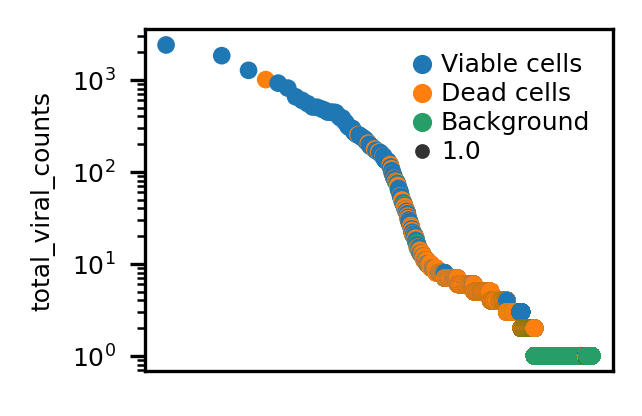

In [23]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.rc('font', size=6)
plt.grid(False)
plt.xlabel("Viral UMI counts")
plt.xlabel("Droplets")
sns.scatterplot(data = data, x = "cell_number", y = "total_viral_counts", hue = "cell_in_droplet", linewidth = 0, size = 1.0, rasterized=True, ax=ax)
ax.set(yscale = "log", xscale = "log")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
ax.axes.xaxis.set_visible(False)
# ax.axes.xaxis.set_ticks([])
# plt.tight_layout()
plt.savefig("./figures/knee_totalviralUMI_ileum.pdf")

In [185]:
celltype_counts_ileum = pd.read_csv("./../csvs/ileum_mean_viral_exp.csv", index_col=0)
celltype_counts_ileum = celltype_counts_ileum.dropna(axis= 1, how= "all")
print(celltype_counts_ileum)
celltype_counts_heart = pd.read_csv("./../csvs/heart_mean_viral_exp.csv", index_col=0)
celltype_counts_heart = celltype_counts_heart.dropna(axis= 1, how= "all")
print(celltype_counts_heart)
mean_viral_exp = celltype_counts_ileum.join(celltype_counts_heart, how = "outer", lsuffix="_Iluem", rsuffix="_Heart")
# mean_viral_exp.index = ["T1L-WT_D1PI", "T1L-WT_D4PI", "T1L-WT_D7PI",  "T1L-WT_D10PI"]
# print(mean_viral_exp)
mean_viral_exp = mean_viral_exp.reindex(["T1L-WT_D1PI", "T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"])
mean_viral_exp

             Axial mural cells  B-cells  Endothelial cells  \
condition                                                    
T1L-WT_D1PI               76.0    170.0               26.0   
T1L-WT_D4PI                NaN      NaN                NaN   

             Entero-endochrine cells  Enterocytes  Goblet cells  \
condition                                                         
T1L-WT_D1PI                   1276.0   273.653846         108.0   
T1L-WT_D4PI                      NaN          NaN           NaN   

             Lymphatic cells  Stem/TA  
condition                              
T1L-WT_D1PI              NaN     12.0  
T1L-WT_D4PI            586.6      NaN  
              B-cells  Cardiomyocytes  Dendritic cells  Endocardial cells  \
condition                                                                   
T1L-WT_D4PI       NaN        6.666667         2.500000          83.100000   
T1L-WT_D7PI       2.0        2.000000         8.352941           6.666667   
T1L-WT_D10PI  

,Axial mural cells,B-cells_Iluem,Endothelial cells_Iluem,Entero-endochrine cells,Enterocytes,Goblet cells,Lymphatic cells,Stem/TA,B-cells_Heart,Cardiomyocytes,...,Endocardial cells,Endothelial cells_Heart,Erythroblasts,Fibroblasts,Macrophages,Mural cells,NK cells,Neutrophils,Pericardial cells,T-cells
condition,,,,,,,,,,,,,,,,,,,,,
T1L-WT_D1PI,76.0,170.0,26.0,1276.0,273.653846,108.0,NaN,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T1L-WT_D4PI,NaN,NaN,NaN,NaN,NaN,NaN,586.6,NaN,NaN,6.666667,...,83.100000,6.505495,2.0,3.172414,4.454545,2.00,NaN,NaN,NaN,2.00000
T1L-WT_D7PI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.000000,...,6.666667,2.454545,NaN,2.214286,3.000000,12.75,2.0,13.5,2.5,3.61194
T1L-WT_D10PI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000


In [186]:
celltype_counts_ileum = pd.read_csv("./../csvs/ileum_pct_cells.csv", index_col=0)
celltype_counts_ileum = celltype_counts_ileum.dropna(axis= 1, how= "all")
print(celltype_counts_ileum)
celltype_counts_heart = pd.read_csv("./../csvs/heart_pct_cells.csv", index_col=0)
celltype_counts_heart = celltype_counts_heart.dropna(axis= 1, how= "all")
print(celltype_counts_heart)
pct_cells = celltype_counts_ileum.join(celltype_counts_heart, how = "outer", lsuffix="_Iluem", rsuffix="_Heart")
# pct_cells.index = ["T1L-WT_D1PI", "T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"]
# print(pct_cells)
pct_cells = pct_cells.reindex(["T1L-WT_D1PI", "T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"])
pct_cells

             Axial mural cells  B-cells  Endothelial cells  \
condition                                                    
T1L-WT_D1PI                0.7     0.36               0.36   
T1L-WT_D4PI                NaN      NaN                NaN   

             Entero-endochrine cells  Enterocytes  Goblet cells  \
condition                                                         
T1L-WT_D1PI                     10.0         4.21           2.7   
T1L-WT_D4PI                      NaN          NaN           NaN   

             Lymphatic cells  Stem/TA  
condition                              
T1L-WT_D1PI              NaN     0.26  
T1L-WT_D4PI             5.15      NaN  
              B-cells  Cardiomyocytes  Dendritic cells  Endocardial cells  \
condition                                                                   
T1L-WT_D4PI       NaN            1.94             1.41               4.37   
T1L-WT_D7PI      1.64            3.45             4.62              10.59   
T1L-WT_D10PI  

,Axial mural cells,B-cells_Iluem,Endothelial cells_Iluem,Entero-endochrine cells,Enterocytes,Goblet cells,Lymphatic cells,Stem/TA,B-cells_Heart,Cardiomyocytes,...,Endocardial cells,Endothelial cells_Heart,Erythroblasts,Fibroblasts,Macrophages,Mural cells,NK cells,Neutrophils,Pericardial cells,T-cells
condition,,,,,,,,,,,,,,,,,,,,,
T1L-WT_D1PI,0.7,0.36,0.36,10.0,4.21,2.7,NaN,0.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T1L-WT_D4PI,NaN,NaN,NaN,NaN,NaN,NaN,5.15,NaN,NaN,1.94,...,4.37,3.78,1.18,1.42,2.95,1.68,NaN,NaN,NaN,1.96
T1L-WT_D7PI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,3.45,...,10.59,6.42,NaN,2.66,4.08,4.04,3.54,5.63,5.88,4.32
T1L-WT_D10PI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15


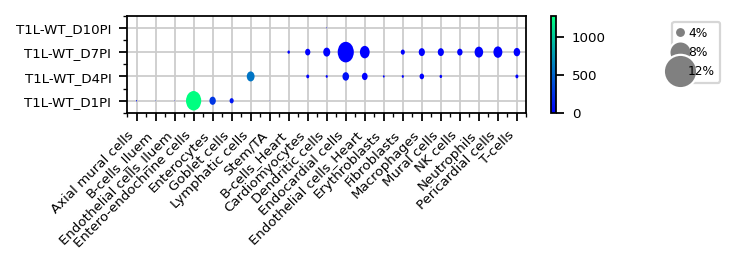

In [196]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), transparent=True, vector_friendly=False, format="pdf")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
plt.rcParams['axes.axisbelow'] = True

N = pct_cells.shape[0]
M = pct_cells.shape[1]
ylabels = pct_cells.index
xlabels = pct_cells.columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = pct_cells.fillna(0).to_numpy()
c = mean_viral_exp.fillna(0).to_numpy()
# print(c.flatten())
# print(s.flatten())

fig, ax = plt.subplots(figsize=(4.0,0.8))

R = (s/100.0)*4
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="winter")
col.set_clim([0, np.max(c)])

ax.add_collection(col)
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.colorbar(col)

from matplotlib.lines import Line2D
line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=5, markerfacecolor="grey")
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="grey")
line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=15, markerfacecolor="grey")
# line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=, markerfacecolor="grey")
plt.legend((line1,line2,line3),('4%','8%', "12%"),numpoints=1, bbox_to_anchor = (1.5,1.0))

plt.savefig("figures/viral_exp_all_dotplot.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)